# San Francisco Rental Prices Dashboard

In [32]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [33]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Import Data

In [34]:
# Import the CSVs to Pandas DataFrames
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [64]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [36]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


## Housing Units Per Year

In [37]:
# Calculate the mean number of housing units per year (hint: use groupby) 

housing_units = sfo_data['housing_units']
housing_units_per_year = housing_units.groupby('year').mean()
housing_units_per_year.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

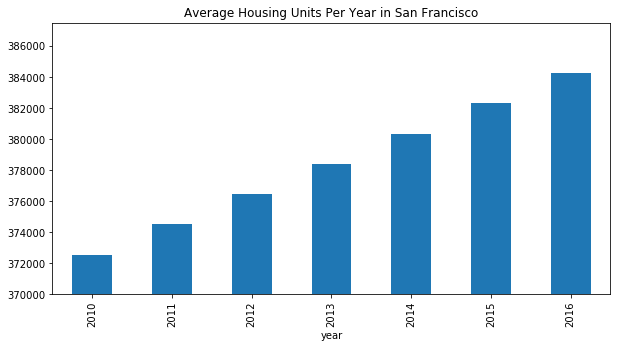

In [54]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

housing_per_year_plot = housing_units_per_year.plot.bar(ylim=(370000,387500),figsize=(10,5),
                                                        title='Average Housing Units Per Year in San Francisco')
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart



## Average Prices per Square Foot

#### In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [39]:
# Calculate the average gross rent and average sale price per square foot

gross_rent_sale_price = sfo_data[['gross_rent','sale_price_sqr_foot']]
average_rent_sale_price = gross_rent_sale_price.groupby('year').mean()
average_rent_sale_price.head()

,gross_rent,sale_price_sqr_foot
year,,
2010,1239,369.344353
2011,1530,341.903429
2012,2324,399.389968
2013,2971,483.600304
2014,3528,556.277273


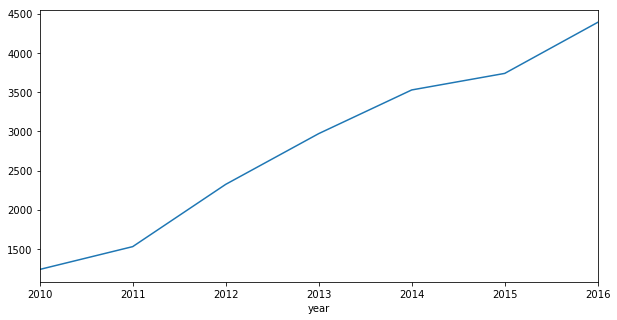

In [40]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_gross_rent = sfo_data['gross_rent'].groupby('year').mean()
plot_avg_yearly_rent = average_gross_rent.plot.line(figsize=(10,5))

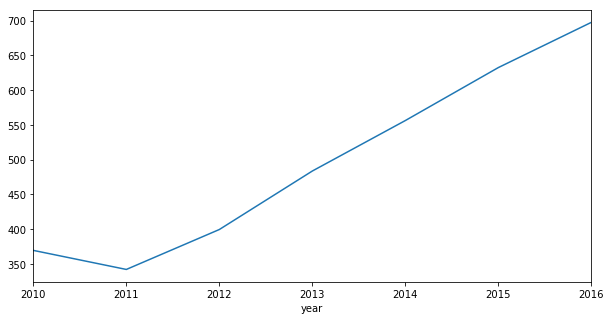

In [41]:
# Plot the Average Sales Price per Year as a line chart
average_sale_price = sfo_data['sale_price_sqr_foot'].groupby('year').mean()
plot_avg_sale_price = average_sale_price.plot.line(figsize=(10,5))

## Average Prices by Neighborhood

#### In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.
#### Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [42]:
# Group by year and neighborhood and then create a new dataframe of the mean values

neighborhood_avg = sfo_data.groupby(['neighborhood','year']).mean()
neighborhood_avg.head()

sale_price_sqr_foot  housing_units  gross_rent
neighborhood year                                                
Alamo Square 2010           291.182945         372560        1239
             2011           272.527310         374507        1530
             2012           183.099317         376454        2324
             2013           387.794144         378401        2971
             2014           484.443552         380348        3528

In [43]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

neighborhood_avg.hvplot.line(
    x = 'year', 
    xlabel = 'Year', 
    y = 'sale_price_sqr_foot',
    ylabel = 'Sale Price per Square Foot',
    groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

## The Top 10 Most Expensive Neighborhoods

#### In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [61]:
# Getting the data from the top 10 expensive neighborhoods
neighborhood_price = sfo_data.groupby('neighborhood').mean()

neighborhood_top10 = neighborhood_price.sort_values('sale_price_sqr_foot',ascending=False).head(10)
neighborhood_top10

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [62]:
# Plotting the data from the top 10 expensive neighborhoods

neighborhood_top10 = neighborhood_top10.drop(columns=['housing_units','gross_rent'])
plot_neighborhood_top10 = neighborhood_top10.hvplot.bar(ylabel='Sale Price Per Square Foot',xlabel='Neighborhood',rot=90)
plot_neighborhood_top10

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Parallel Coordinates and Parallel Categories Analysis

#### In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
#### Create a Parallel Coordinates Plot
#### Create a Parallel Categories Plot

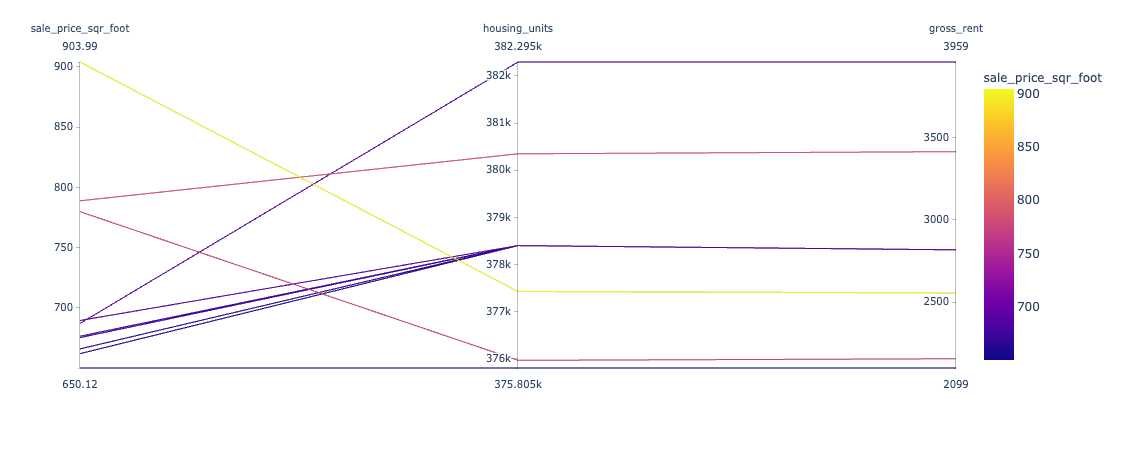

In [46]:
neighborhood_top10.reset_index(inplace=True)
# Parallel Coordinates Plot
px.parallel_coordinates(
    neighborhood_top10,
    color='sale_price_sqr_foot')

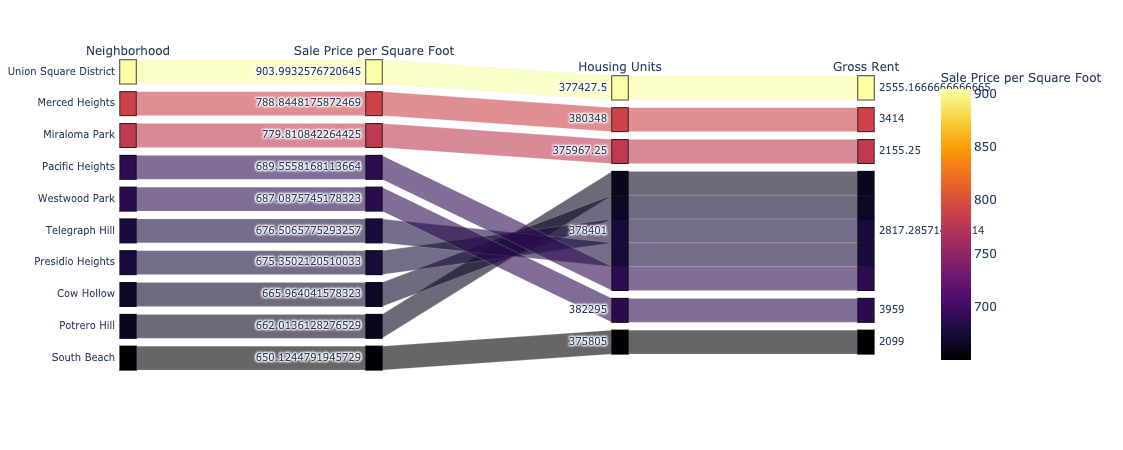

In [47]:
# Parallel Categories Plot

px.parallel_categories(
    neighborhood_top10,
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Square Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
            
    })

## Neighborhood Map

#### Neighborhood Map
#### In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

In [48]:
# Load neighborhoods coordinates data

file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


## Data Preparation

#### You will need to join the location data with the mean prices per neighborhood
#### Calculate the mean values for each neighborhood
#### Join the average values with the neighborhood locations

In [49]:
# Calculate the mean values for each neighborhood

neighborhood_mean_values = sfo_data.groupby('neighborhood').mean().reset_index()
neighborhood_mean_values.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [50]:
# Join the average values with the neighborhood locations

neighborhood_value_locations = pd.concat([df_neighborhood_locations, neighborhood_mean_values],axis='columns')
neighborhood_value_locations.drop(columns='neighborhood',inplace=True)
neighborhood_value_locations.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


## Mapbox Visualization

#### Plot the average values per neighborhood with a plotly express scatter_mapbox visualization.

In [53]:
# Create a scatter mapbox to analyze neighborhood info

map = px.scatter_mapbox(
    neighborhood_value_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4
)

# Display the map
map.show() 

In [54]:
map.show()

In [51]:
neighborhood_value_locations = neighborhood_value_locations.drop(columns='Neighborhood')

In [53]:
map = px.scatter_mapbox(
    neighborhood_value_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent")

map.show()